<a href="https://colab.research.google.com/github/felipebmuniz/ciencia-de-dados-trabalho-final/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final de Topicos de Computação 1

# Parte de Visualização dos dados e limpeza dos mesmos.

In [2]:
# Importação das bibliotecas para visualização dos dados e trabalhas com o formato de date
import pandas as pd
from datetime import date

In [3]:
# Acesso dos dados por meio do google drive - dados disponibilizados pelo professor referentes o RU
data_1 = pd.read_csv("/content/drive/MyDrive/DadosRU/part-1", sep=';')
data_2 = pd.read_csv("/content/drive/MyDrive/DadosRU/part-2")
data_3 = pd.read_csv("/content/drive/MyDrive/DadosRU/part-3")

In [4]:
# Observando a amostra de dados da parte 1
data_1.head()

,date,lunch,dinner
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [5]:
# Observando a amostra de dados da parte 2
data_2.head()

,Data,Qt_almoco,Qt_jantar
0,2017-05-01,0,0
1,2017-05-02,734,491
2,2017-05-03,805,501
3,2017-05-04,807,555
4,2017-05-05,671,375


In [6]:
# Observando a amostra de dados da parte 3
data_3.head()

,Unnamed: 0,Data,Qt_almoco,Qt_jantar
0,0,2018-01-02,0,0
1,1,2018-01-03,0,0
2,2,2018-01-04,0,0
3,3,2018-01-05,0,0
4,4,2018-01-08,69,0


In [7]:
# Padronizando os valores das colunas da parte 1 entre os dados disponibilizados
data_1.columns = ['Data', 'Qt_almoco', 'Qt_jantar']
data_1.head()

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [8]:
#  Verifica as colunas existentes na parte 3
data_3.columns

Index(['Unnamed: 0', 'Data', 'Qt_almoco', 'Qt_jantar'], dtype='object')

In [9]:
#  Removendo a coluna 0 onde não teria seria utilizada  para a análise dos dados
data_3.pop(data_3.columns[0])

0        0
1        1
2        2
3        3
4        4
      ... 
577    577
578    578
579    579
580    580
581    581
Name: Unnamed: 0, Length: 582, dtype: int64

In [10]:
# verificando a remoção da coluna ociosa
data_3.head()

,Data,Qt_almoco,Qt_jantar
0,2018-01-02,0,0
1,2018-01-03,0,0
2,2018-01-04,0,0
3,2018-01-05,0,0
4,2018-01-08,69,0


In [11]:
# Junção dos dados do RU em um dataframe
dataframe_completo_RU = pd.concat([data_1, data_2, data_3])
dataframe_completo_RU

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218
...,...,...,...
577,2020-03-25,0,0
578,2020-03-26,11,13
579,2020-03-27,15,14
580,2020-03-30,13,12


In [12]:
# dataframe_completo_RU.to_csv("dataframe_completo_RU.csv", encoding = 'utf-8')

# Técnicas de Regressão e Séries Temporais


## Séries Temporais



In [ ]:
# Variáveis para trabalhar as técnicas
df_reg = dataframe_completo_RU
df_temp = dataframe_completo_RU

In [14]:
# Verificando a interpretação da coluna de Data
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 0 to 581
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       1270 non-null   object
 1   Qt_almoco  1270 non-null   int64 
 2   Qt_jantar  1270 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.7+ KB


In [15]:
# Para série temporal a coluna de eixo temporal dever possuir o valor de dateTime. Por tanto, utilizaremos a função pd.to_datetime().
df_temp.Data = pd.to_datetime(df_temp.Data)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 0 to 581
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       1270 non-null   datetime64[ns]
 1   Qt_almoco  1270 non-null   int64         
 2   Qt_jantar  1270 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 39.7 KB


In [16]:
# Transformaremos a columa Data no nosso coluna indexadora dos demais itens utilizando o comando df.set_index().
df_temp.set_index('Data', inplace=True)
df_temp

,Qt_almoco,Qt_jantar
Data,,
2016-01-04,364,294
2016-01-05,489,363
2016-01-06,522,401
2016-01-07,514,349
2016-01-08,409,218
...,...,...
2020-03-25,0,0
2020-03-26,11,13
2020-03-27,15,14


In [17]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1270 entries, 2016-01-04 to 2020-03-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Qt_almoco  1270 non-null   int64
 1   Qt_jantar  1270 non-null   int64
dtypes: int64(2)
memory usage: 29.8 KB


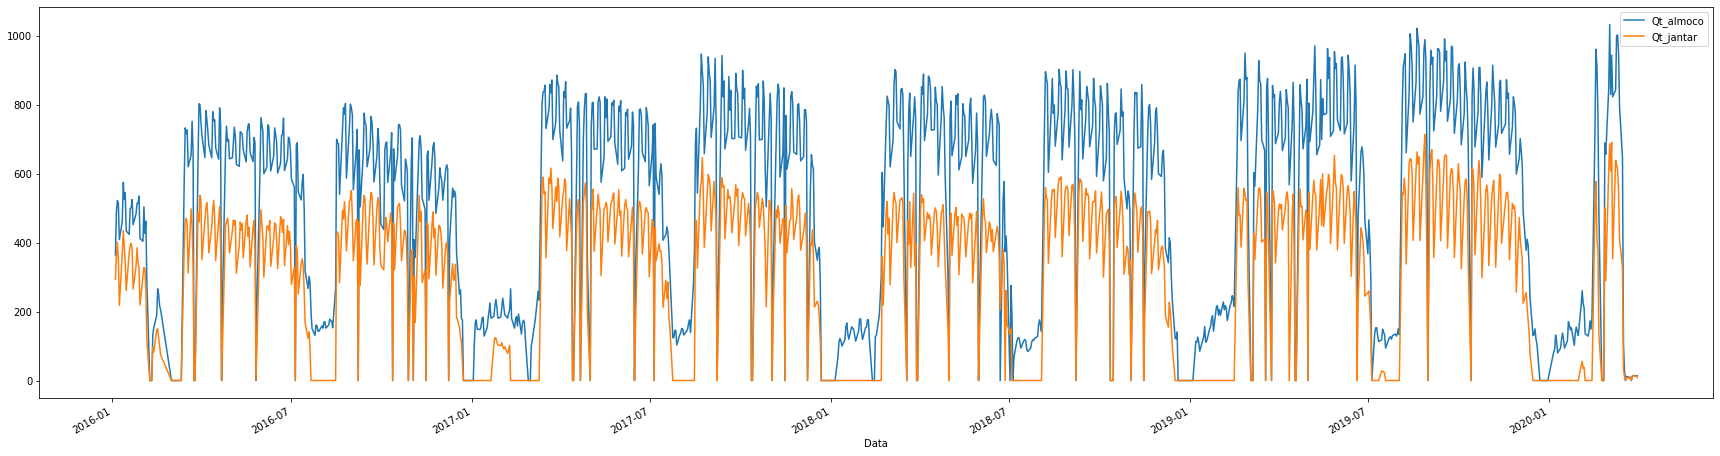

In [18]:
#  Plotagem do gráfico para análise dos valores
df_temp.plot(figsize=(30, 8))

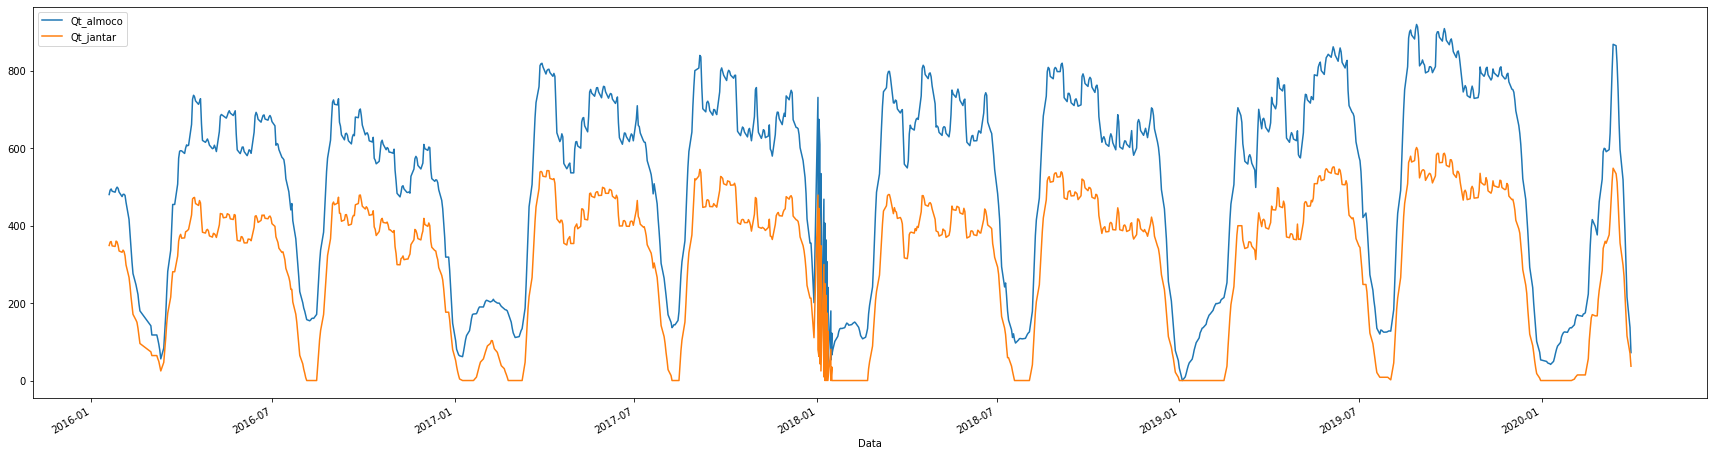

In [19]:
# Por possuir bastante ruídos, será aplicado a técnica de médias movéis para a eliminação desses ruídos. Como se trata de o período de anos, a média móvel será em 12 períodos.
# Dada pela função Series.rolling(num_de_periodos).mean().plot()
df_temp.rolling(12).mean().plot(figsize=(30, 8))

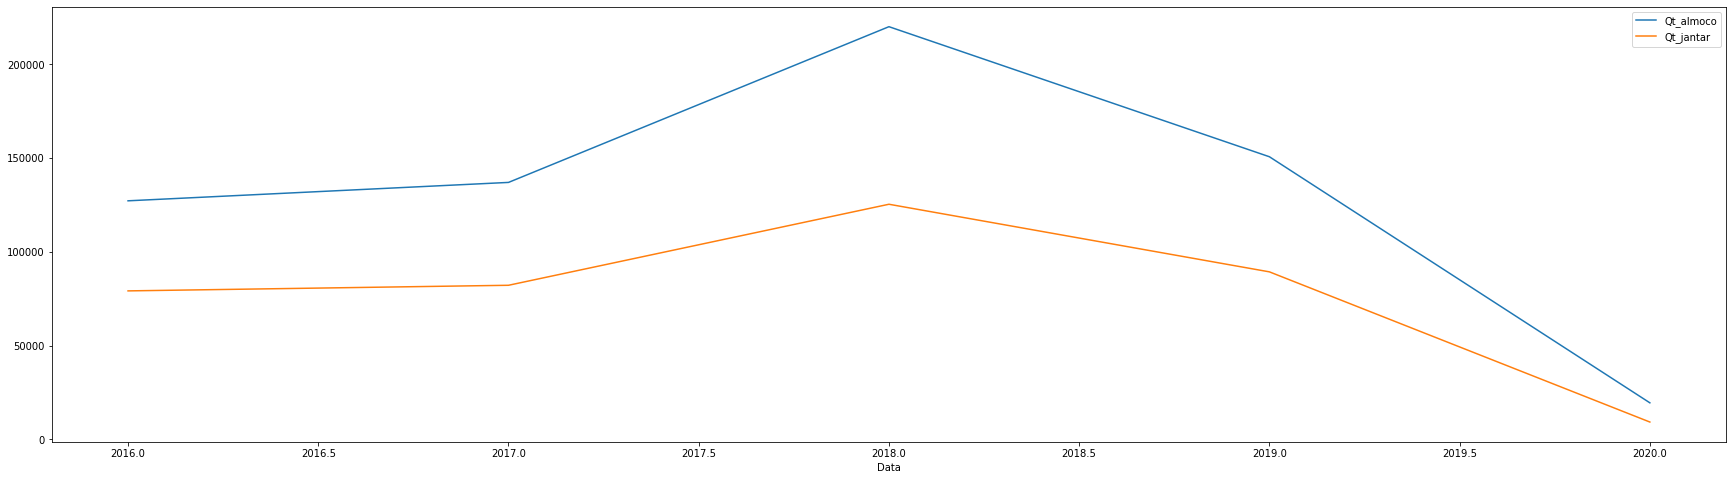

In [20]:
# Fazendo a análise por meio de agrupamento do ano do total consumido 
df_temp.groupby(df_temp.index.year).sum().plot(figsize=(30, 8))

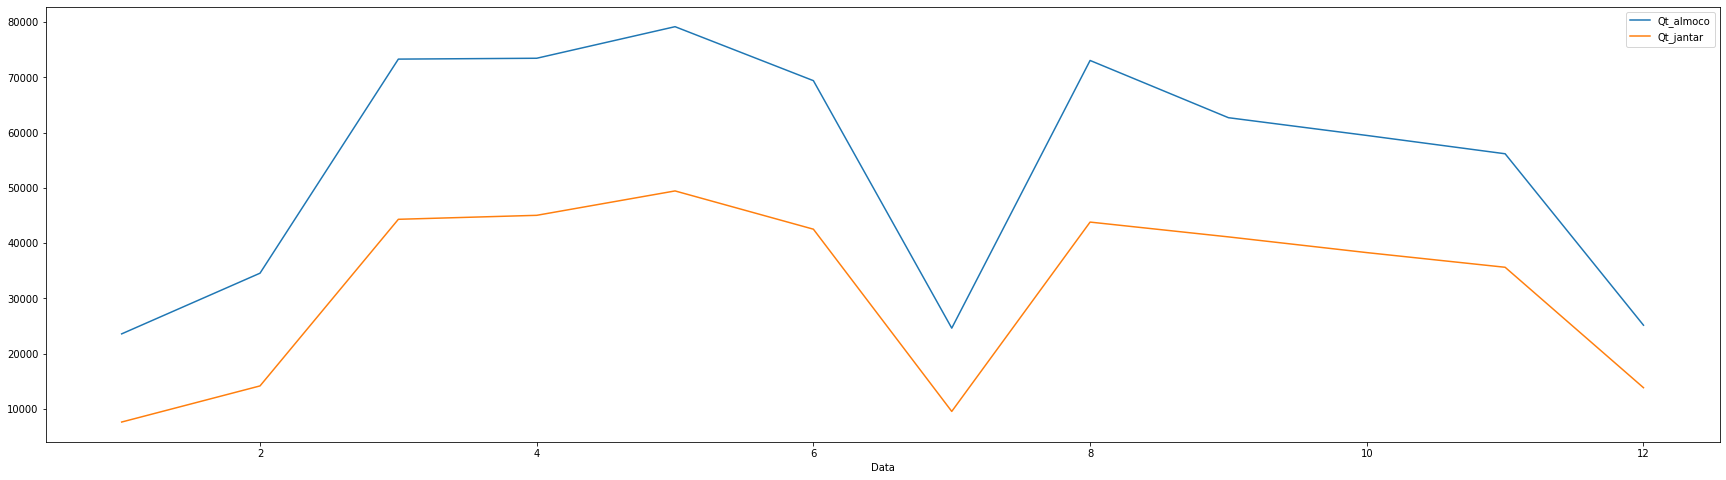

In [21]:
# Fazendo a análise por meio de agrupamento por mês do total consumido 
df_temp.groupby(df_temp.index.month).sum().plot(figsize=(30, 8))

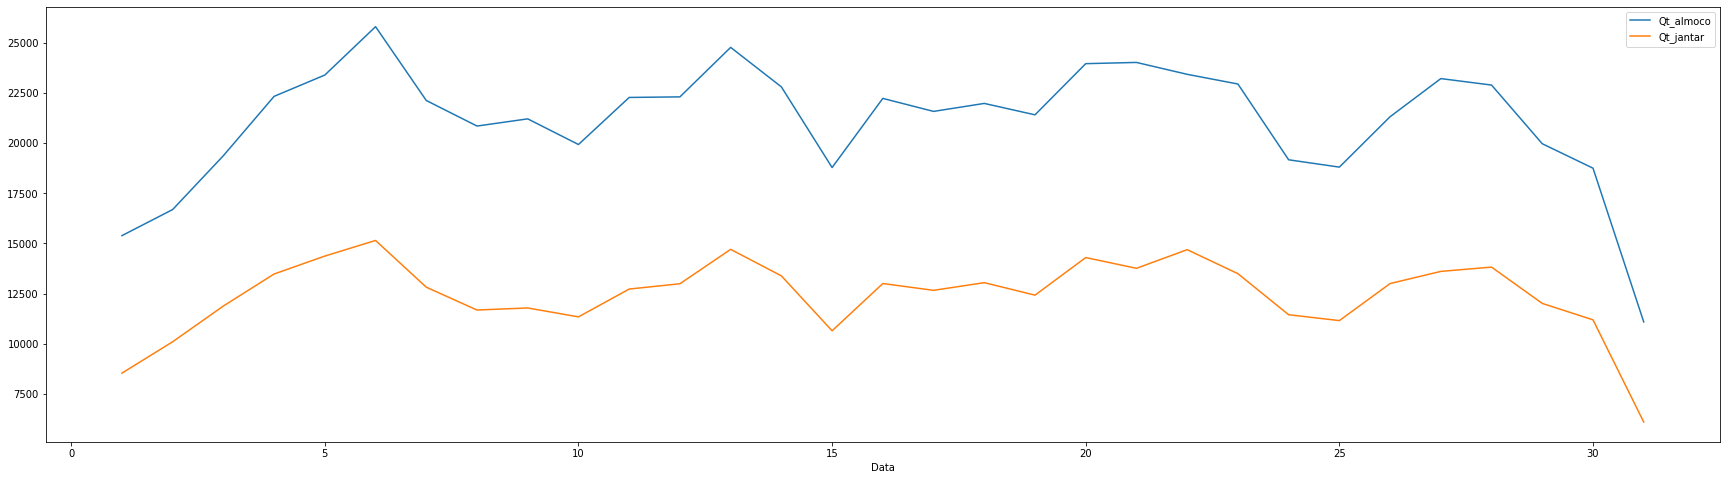

In [22]:
# Fazendo a análise por meio de agrupamento por dia do total consumido 
df_temp.groupby(df_temp.index.day).sum().plot(figsize=(30, 8))

## Regressão Linear